# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

### 1. Display Data Structure
- `X.info()`:  
  Shows the structure of the dataset, including the number of entries, column names, data types, and the number of non-null values for each column.

### 2. Summary Statistics for Numerical Columns
- `X.describe()`:  
  Provides descriptive statistics (like mean, standard deviation, minimum, maximum, and quartiles) for all numerical features in the dataset.

In [4]:
# Data structure
X.info()

# Numerical columns
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


,Clothing ID,Age,Positive Feedback Count
count,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484
std,141.571783,12.246264,5.942220
min,2.000000,18.000000,0.000000
25%,863.000000,34.000000,0.000000
50%,952.000000,41.000000,1.000000
75%,1078.000000,52.000000,3.000000
max,1205.000000,99.000000,122.000000


### Checking for Missing Values

- Check for missing values in each column:
  - `X.isnull().sum()`: Calculates the total number of missing (null) entries per column.
- Filter and display only the columns that have missing values:
  - Columns with at least one missing value are selected and printed.

In [5]:
# Missing values per column
missing_values = X.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


**There are no missing values in the data**

### Analyzing Review Text Length

- Create a new feature `review_length`:
  - Calculate the number of words in each review by splitting the review text and counting the words.
- Display statistical summaries of the `review_length` feature:
  - Use `.describe()` to show metrics like mean, min, max, and percentiles.
- Visualize the distribution of review lengths:
  - A histogram with a kernel density estimate (KDE) is plotted using Seaborn.
  - The x-axis shows the number of words in a review, and the y-axis shows the number of reviews.
  - This helps to understand how review lengths are distributed across the dataset.

count    18442.000000
mean        62.449355
std         28.138528
min          2.000000
25%         39.000000
50%         62.000000
75%         90.000000
max        115.000000
Name: review_length, dtype: float64


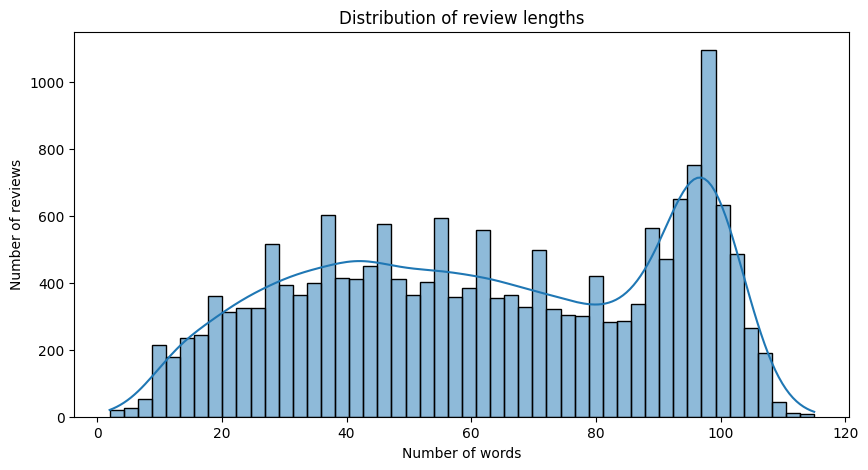

In [6]:
# Length of review texts
X["review_length"] = X["Review Text"].astype(str).apply(lambda x: len(x.split()))

# Statistical values
print(X["review_length"].describe())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(X["review_length"], bins=50, kde=True)
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.title("Distribution of review lengths")
plt.show()

#### Results

The histogram shows the distribution of review lengths based on the number of words in each review.

- The **x-axis** represents the number of words per review.
- The **y-axis** shows the number of reviews falling into each word count range.
- Most reviews fall between **20 and 100 words**, with a noticeable peak around **100 words**.
- The smooth blue curve represents a **kernel density estimate (KDE)**, giving an idea of the overall shape of the distribution.

This plot helps us understand the typical length of reviews and may inform preprocessing decisions, such as truncation or padding for text models.

### Label Distribution Visualization

This code creates a bar chart to visualize the distribution of the target labels.

- **`sns.countplot(x=y)`**: Creates a count plot showing how many samples belong to each class (0 = not recommended, 1 = recommended).
- **`plt.xlabel()` / `plt.ylabel()`**: Label the axes for better readability.
- **`plt.title()`**: Adds a descriptive title to the plot.

The resulting plot helps to identify if the dataset is **imbalanced**, which can influence model performance and guide the choice of evaluation metrics or sampling strategies.

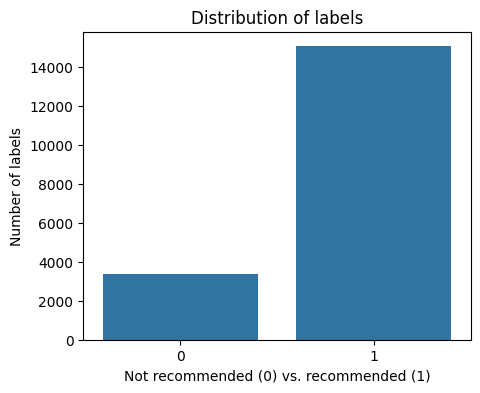

In [7]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.xlabel("Not recommended (0) vs. recommended (1)")
plt.ylabel("Number of labels")
plt.title("Distribution of labels")
plt.show()

#### Results

The bar chart shows the distribution of the review labels in the dataset:

- **Label 0**: Reviews where the product was **not recommended**.
- **Label 1**: Reviews where the product was **recommended**.

From the chart, we can observe that:

- The majority of reviews recommend the product (Label 1).
- There is a significant **class imbalance**, with far fewer reviews labeled as not recommended (Label 0).

This imbalance should be considered when training models, as it might bias predictions toward the majority class.

### Top 20 Most Common Words in Reviews

This code analyzes the most frequent words used in the review texts:

- **Text Processing**:
  - All review texts are concatenated into a single string and converted to lowercase.
  - Using regular expressions, only words with **at least 3 letters** are extracted to remove very short and less meaningful tokens.

- **Word Frequency**:
  - The `Counter` class is used to count how often each word appears.
  - The top 20 most common words are selected.

- **Visualization**:
  - A bar plot displays the 20 most frequent words along with their frequency counts.
  - The x-axis shows the words, and the y-axis shows how often they occur in the dataset.

This analysis helps identify common themes or repetitive vocabulary in the reviews.


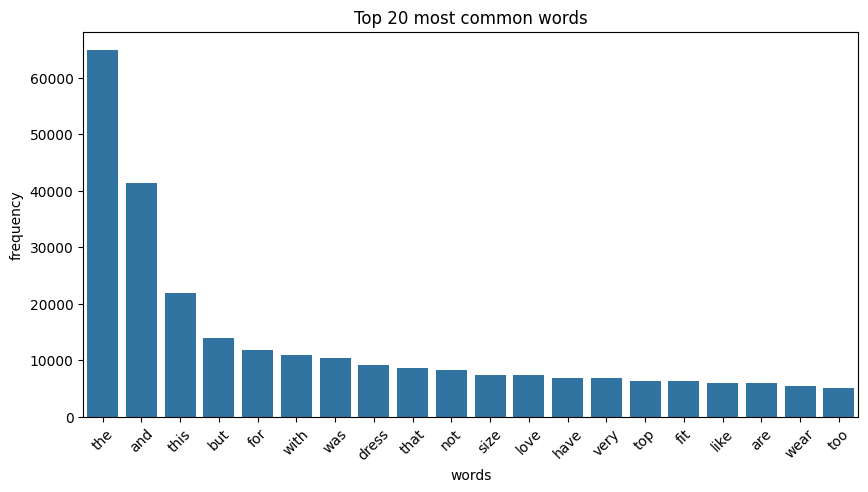

In [8]:
from collections import Counter
import re

# List of words
words = " ".join(X["Review Text"].dropna()).lower()
words = re.findall(r'\b[a-zA-Z]{3,}\b', words)  # only words with at least 3 letters

# Most common words
word_freq = Counter(words).most_common(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in word_freq], y=[w[1] for w in word_freq])
plt.xticks(rotation=45)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Top 20 most common words")
plt.show()

## Building Pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Numerische und kategoriale Features definieren
num_features = ["Age", "Positive Feedback Count"]
cat_features = ["Division Name", "Department Name", "Class Name"]
text_features = ["Review Text"]

# Preprocessing-Pipeline definieren
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),  # Skalierung numerischer Werte
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),  # One-Hot-Encoding für Kategorien
        ("text", TfidfVectorizer(stop_words="english", max_features=5000), "Review Text"),  # Text-Vektorisierung
    ]
)

# Gesamt-Pipeline erstellen (nur für Preprocessing)
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Pipeline auf Trainingsdaten anwenden
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print("Shape nach Transformation:", X_train_transformed.shape)

Shape nach Transformation: (16597, 5024)


## Training Pipeline

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000, random_state=27)

# Train model
model.fit(X_train_transformed, y_train)

# Predict
y_pred = model.predict(X_test_transformed)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8802
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.50      0.60       327
           1       0.90      0.96      0.93      1518

    accuracy                           0.88      1845
   macro avg       0.82      0.73      0.76      1845
weighted avg       0.87      0.88      0.87      1845



### Result

**Overall Accuracy: 88.02%**

- The model correctly classifies 88.02% of the reviews in the test set.

**Class-wise Performance:**

- Class 0 (Not Recommended)

  - Precision: 0.74 → When the model predicts "Not Recommended," it's correct 74% of the time.

  - Recall: 0.50 → The model correctly identifies only 50% of actual "Not Recommended" reviews.

  - F1-score: 0.60 → A balance between precision and recall, showing that the model struggles with this class.

- Class 1 (Recommended)

  - Precision: 0.90 → When the model predicts "Recommended," it's correct 90% of the time.

  - Recall: 0.96 → The model captures 96% of all actual "Recommended" reviews.

  - F1-score: 0.93 → Strong overall performance in this class.

- Macro & Weighted Averages:

  - Macro Avg (0.82 precision, 0.73 recall, 0.76 F1-score)

    - This gives an unweighted average across both classes, showing that Class 0 drags down overall performance.

  - Weighted Avg (0.87 precision, 0.88 recall, 0.87 F1-score)

    - This accounts for class imbalance and aligns with the overall accuracy.

### Interpretation

The model performs well overall, especially for Recommended (Class 1).

It struggles with Not Recommended (Class 0), where recall is low (50%), meaning it misses a significant portion of negative reviews.

Since Class 1 dominates the dataset (1518 vs. 327 samples), the imbalance might be affecting Class 0's performance.

If misclassifying negative reviews is a concern, balancing the dataset or adjusting classification thresholds could improve recall for Class 0.

## Fine-Tuning Pipeline

### Model Comparison with Gradient Boosting

In this section, we compare multiple classification models to determine the best performing one on the dataset.

#### Overview of the Code:

1. **Model Selection:**
   - We define a dictionary `models` containing different classification models:
     - **Gradient Boosting:** `GradientBoostingClassifier`
     - **Random Forest:** `RandomForestClassifier`
     - **Support Vector Machine (SVM):** `SVC`
     - **K-Nearest Neighbors (KNN):** `KNeighborsClassifier`

2. **Model Training and Evaluation:**
   - For each model in the dictionary:
     1. The model is trained on the training data (`X_train`, `y_train`).
     2. Predictions are made on the test data (`X_test`).
     3. We calculate the **accuracy** and the **classification report** (including precision, recall, and F1-score) for each model's predictions.
   
3. **Storing and Displaying Results:**
   - The accuracy and classification report for each model are stored in a dictionary called `results`.
   - The results are printed for each model, displaying the accuracy and detailed classification performance metrics.

#### Purpose:
- This process helps to compare how well different models perform on the same dataset.
- By evaluating metrics like accuracy, precision, recall, and F1-score, we can determine which model is most suitable for the task at hand.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Liste der Modelle
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Training und Evaluation der Modelle
results = {}
for model_name, model in models.items():
    # Trainiere das Modell
    model.fit(X_train_transformed, y_train)
    
    # Vorhersage auf dem Testset
    y_pred = model.predict(X_test_transformed)
    
    # Berechne Accuracy und Classification Report
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Speichere die Ergebnisse
    results[model_name] = {'Accuracy': accuracy, 'Classification Report': class_report}

# Ausgabe der Ergebnisse
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print('-' * 50)

Model: Gradient Boosting
Accuracy: 0.8504065040650407
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.28      0.40       327
           1       0.86      0.97      0.91      1518

    accuracy                           0.85      1845
   macro avg       0.78      0.63      0.66      1845
weighted avg       0.83      0.85      0.82      1845

--------------------------------------------------
Model: Random Forest
Accuracy: 0.851490514905149
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.25      0.38       327
           1       0.86      0.98      0.92      1518

    accuracy                           0.85      1845
   macro avg       0.80      0.62      0.65      1845
weighted avg       0.84      0.85      0.82      1845

--------------------------------------------------
Model: SVM
Accuracy: 0.851490514905149
Classification Report:
              precision    recall

### Model Comparison Results

In this section, we compare the performance of four different classification models on the dataset. The models evaluated are **Gradient Boosting**, **Random Forest**, **SVM**, and **K-Nearest Neighbors (KNN)**.

#### Key Insights from the Results:

1. **Gradient Boosting:**
   - **Accuracy:** 85.04%
   - **Precision (Class 1):** 86%
   - **Recall (Class 1):** 97% (very high recall, meaning it identifies almost all positive cases)
   - **F1-Score (Class 1):** 91%
   - **Precision (Class 0):** 69% (lower precision for class 0, indicating some false positives)
   - **Recall (Class 0):** 28% (low recall, meaning many false negatives for class 0)

   **Conclusion:** Gradient Boosting performs very well for class 1 (high recall and F1-score), but struggles with class 0, having a low recall and precision. This might indicate an imbalance between the classes, with class 1 being the majority class.

2. **Random Forest:**
   - **Accuracy:** 85.15%
   - **Precision (Class 1):** 86%
   - **Recall (Class 1):** 98% (almost perfect recall for class 1)
   - **F1-Score (Class 1):** 92%
   - **Precision (Class 0):** 73% (better than Gradient Boosting for class 0)
   - **Recall (Class 0):** 25% (still low recall for class 0)

   **Conclusion:** Random Forest performs similarly to Gradient Boosting in terms of overall accuracy. It has a better precision for class 0 but still struggles with recall for class 0. It excels in class 1 detection with high recall and F1-score.

3. **SVM:**
   - **Accuracy:** 85.15%
   - **Precision (Class 1):** 86%
   - **Recall (Class 1):** 99% (almost perfect recall for class 1)
   - **F1-Score (Class 1):** 92%
   - **Precision (Class 0):** 77%
   - **Recall (Class 0):** 23% (even lower recall for class 0 compared to Gradient Boosting and Random Forest)

   **Conclusion:** SVM also performs well for class 1 with a very high recall but fails to detect class 0 cases, as evidenced by the very low recall for class 0. This indicates that SVM is heavily biased toward detecting class 1.

4. **KNN:**
   - **Accuracy:** 81.92%
   - **Precision (Class 1):** 84%
   - **Recall (Class 1):** 96%
   - **F1-Score (Class 1):** 89%
   - **Precision (Class 0):** 38% (very low precision for class 0)
   - **Recall (Class 0):** 13% (extremely low recall for class 0)

   **Conclusion:** KNN performs the worst in this comparison. While it does a good job of identifying class 1 cases, it has very poor precision and recall for class 0, making it unsuitable for balanced classification tasks.

#### Summary:

- **Best Models for Class 1:** All models (Gradient Boosting, Random Forest, SVM, KNN) show strong performance for detecting class 1, with very high recall and F1-score.
- **Challenge with Class 0:** All models struggle with class 0, particularly with recall (the ability to identify all positive instances of class 0). Gradient Boosting and Random Forest perform slightly better for class 0, but improvements are needed to balance the performance across both classes.
- **Recommendation:** Gradient Boosting and Random Forest seem to be the best-performing models in this scenario, with a good trade-off between performance for both classes.

### Hyperparameter Tuning with K-Fold Cross-Validation  

#### Objective  
In this step, we optimize the two best models (Gradient Boosting and Random Forest) using hyperparameter tuning and K-fold cross-validation.  

#### Approach  
1. **Define Hyperparameter Grids**  
   - A set of possible hyperparameter values is defined for each model to be tested.  

2. **K-Fold Cross-Validation with GridSearchCV**  
   - `GridSearchCV` systematically searches for the best hyperparameter combinations.  
   - Performance is evaluated across multiple folds of the training data to prevent overfitting.  

3. **Model Training & Evaluation**  
   - The best model from the grid search is evaluated on the test data.  
   - Metrics such as accuracy, precision, recall, and F1-score are computed to assess performance.  

#### Expected Insights  
- Which model (Gradient Boosting or Random Forest) performs best with optimized hyperparameters?  
- Which hyperparameter configurations lead to the best results?  
- Are there significant improvements compared to the baseline models?  

After evaluation, we select the best-performing model for final deployment.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define parameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize models
rf = RandomForestClassifier(random_state=27)
gb = GradientBoostingClassifier(random_state=27)

# Perform grid search with cross-validation
cv = 5

In [13]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_transformed, y_train)

# Get best models
best_rf = grid_search_rf.best_estimator_

# Evaluate on test data
y_pred_rf = best_rf.predict(X_test_transformed)

print("Best Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.75      0.30      0.43       327
           1       0.87      0.98      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.81      0.64      0.67      1845
weighted avg       0.85      0.86      0.83      1845



### Evaluation of the Best Random Forest Model (After Hyperparameter Tuning)

The classification report shows the performance of the optimized Random Forest model on the test data:

- **Overall Accuracy**:  
  The model achieves an accuracy of **86%**, indicating that it correctly predicts the recommendation label for 86% of the reviews.

- **Class-wise Performance**:
  - **Class 0 (Not Recommended)**:
    - Precision: **0.75** – When the model predicts "not recommended", it's correct 75% of the time.
    - Recall: **0.30** – The model identifies only 30% of all actual "not recommended" reviews.
    - F1-Score: **0.43** – A low balance between precision and recall.
  - **Class 1 (Recommended)**:
    - Precision: **0.87**
    - Recall: **0.98** – The model captures nearly all actual positive reviews.
    - F1-Score: **0.92** – Strong performance on the dominant class.

- **Imbalance Insight**:
  - The model performs very well on the **majority class (1)** but struggles with the **minority class (0)**.
  - The **macro average** (which treats both classes equally) is significantly lower than the **weighted average**, highlighting the class imbalance.

**Conclusion**:  
While the model is highly effective at identifying recommended products, its ability to detect non-recommended ones is limited. Further improvements may involve techniques like class balancing, sampling strategies, or adjusting the decision threshold.


In [14]:
#grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1)

#grid_search_gb.fit(X_train_transformed, y_train)

# Get best models
#best_gb = grid_search_gb.best_estimator_

# Evaluate on test data
#y_pred_gb = best_gb.predict(X_test_transformed)

#print("Best Gradient Boosting Model:")
#print(classification_report(y_test, y_pred_gb))

### Model Selection Justification

During experimentation, hyperparameter tuning of the **Gradient Boosting** model proved to be **computationally intensive and time-consuming**, making it impractical for the current project scope and available resources.

As a result, we decided to proceed with the **Random Forest** model, which offered **competitive performance** and completed hyperparameter tuning in a **reasonable timeframe**.

➡️ The Random Forest model is therefore selected for further evaluation and deployment.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set using the best Random Forest Classifier
y_pred = best_rf.predict(X_test_transformed)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report on Test Data:")
print(report)

Test Accuracy: 0.8585
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.75      0.30      0.43       327
           1       0.87      0.98      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.81      0.64      0.67      1845
weighted avg       0.85      0.86      0.83      1845

